TIENDA ONLINE ICE

El objetivo de este proyecto es analizar los datos de las ventas historicas de la tienda para identificar cuales juegos son lso que más se venden y cuales son los objetivos a futuro con respecto a los resultados obtenidos,

Paso 1. Abre el archivo de datos y estudia la información general

In [1710]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import sidetable as std

In [1711]:
juegos = pd.read_csv('games.csv')

In [1766]:
juegos.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,Des,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,Des,31.38


In [1713]:
def primera_vista(datos):
    print(datos.info())
    print()
    print('Valores ausentes')
    print(datos.isna().sum())
    print()
    print('Valores duplicados')
    print(datos.duplicated().sum())

In [1714]:
primera_vista(juegos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Valores ausentes
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
Us

Podemos observar que en los en los datos tenemos 11 columnas y 16715 filas. Realizando las pruebas conrrespondientes nos damos cuenta que no hay valores duplicados. Sin enbargo, tenemos valores ausentes y tambien nos encontramos con que los nombres de las variables tienen mayusculas. 

Paso 2. Prepara los datos

In [1717]:
juegos.columns = juegos.columns.str.lower()

In [1718]:
juegos.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [1719]:
juegos.stb.missing(style = True)

,missing,total,percent
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
user_score,"6,701","16,715",40.09%
year_of_release,269,"16,715",1.61%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


In [1720]:
juegos['year_of_release'] =juegos['year_of_release'].fillna(0).astype('int')

In [1721]:
juegos['user_score'].value_counts()

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [1722]:
juegos.loc[juegos['user_score']=='tbd','user_score']=np.nan

In [1723]:
juegos['user_score']= juegos['user_score'].astype('float')

In [1724]:
juegos.stb.missing(style = True)

,missing,total,percent
user_score,"9,125","16,715",54.59%
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
year_of_release,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


In [1725]:
juegos['name']=juegos['name'].fillna('Desconocido')
juegos['genre']= juegos['genre'].fillna('Desconocido')
juegos['rating']= juegos['rating'].fillna('Des')

In [1726]:
juegos.stb.missing(style = True)

,missing,total,percent
user_score,"9,125","16,715",54.59%
critic_score,"8,578","16,715",51.32%
name,0,"16,715",0.00%
platform,0,"16,715",0.00%
year_of_release,0,"16,715",0.00%
genre,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%
other_sales,0,"16,715",0.00%


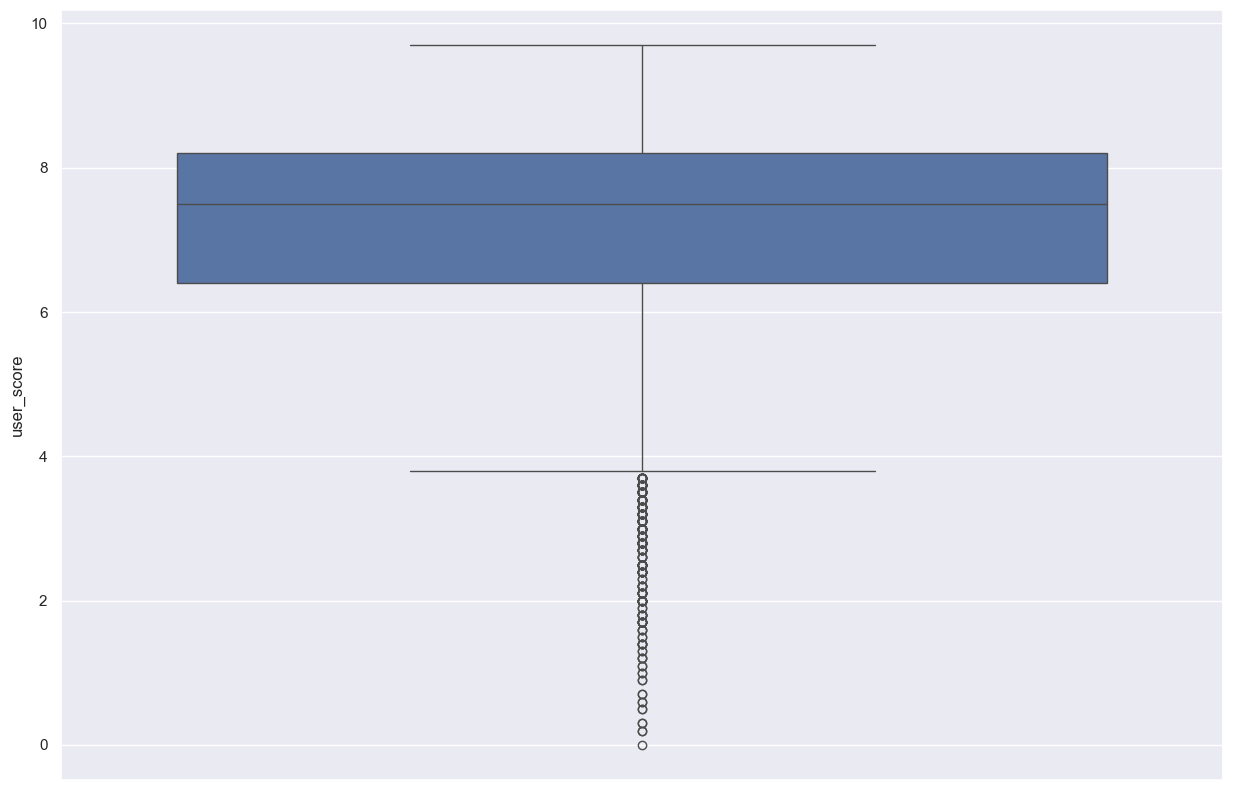

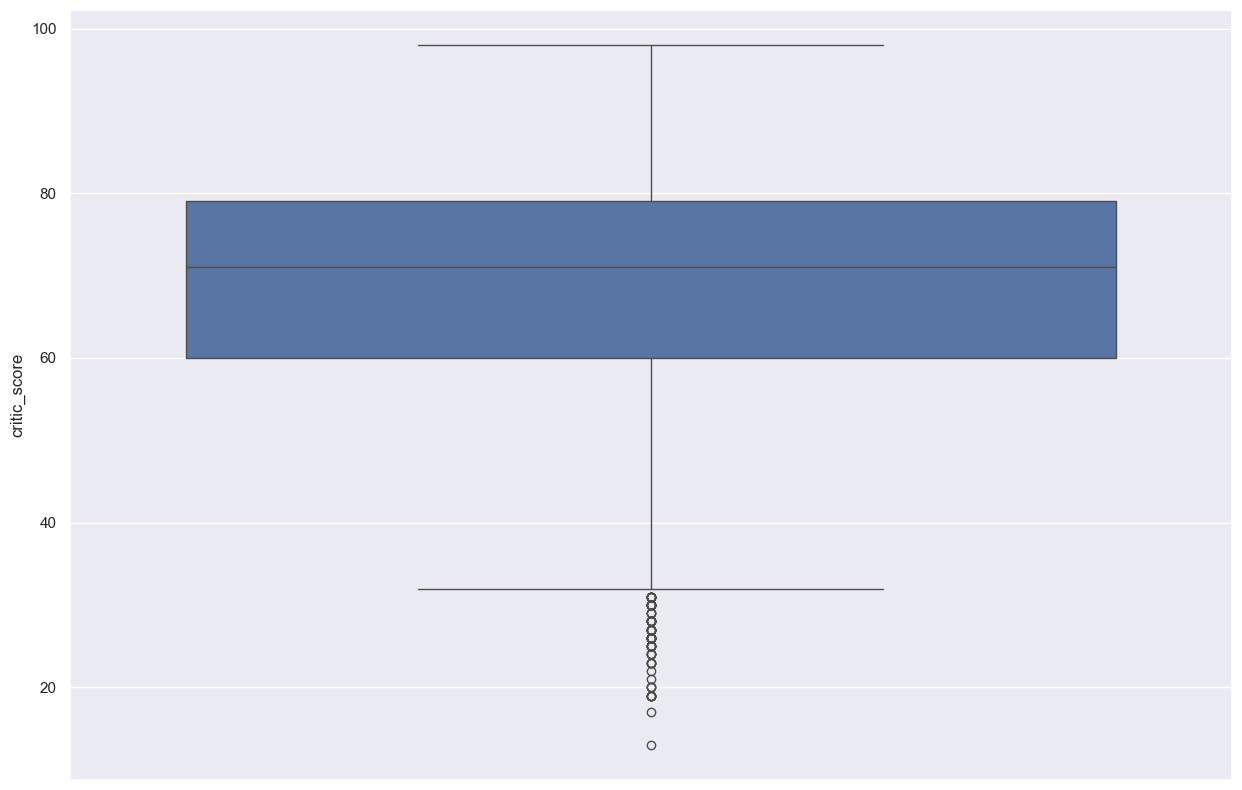

In [1727]:
sns.boxplot(juegos['user_score'])
plt.show()
sns.boxplot(juegos['critic_score'])
plt.show()

In [1728]:
juegos['critic_score']= juegos['critic_score'].fillna(juegos['critic_score'].median())
juegos['user_score']= juegos['user_score'].fillna(juegos['user_score'].median())

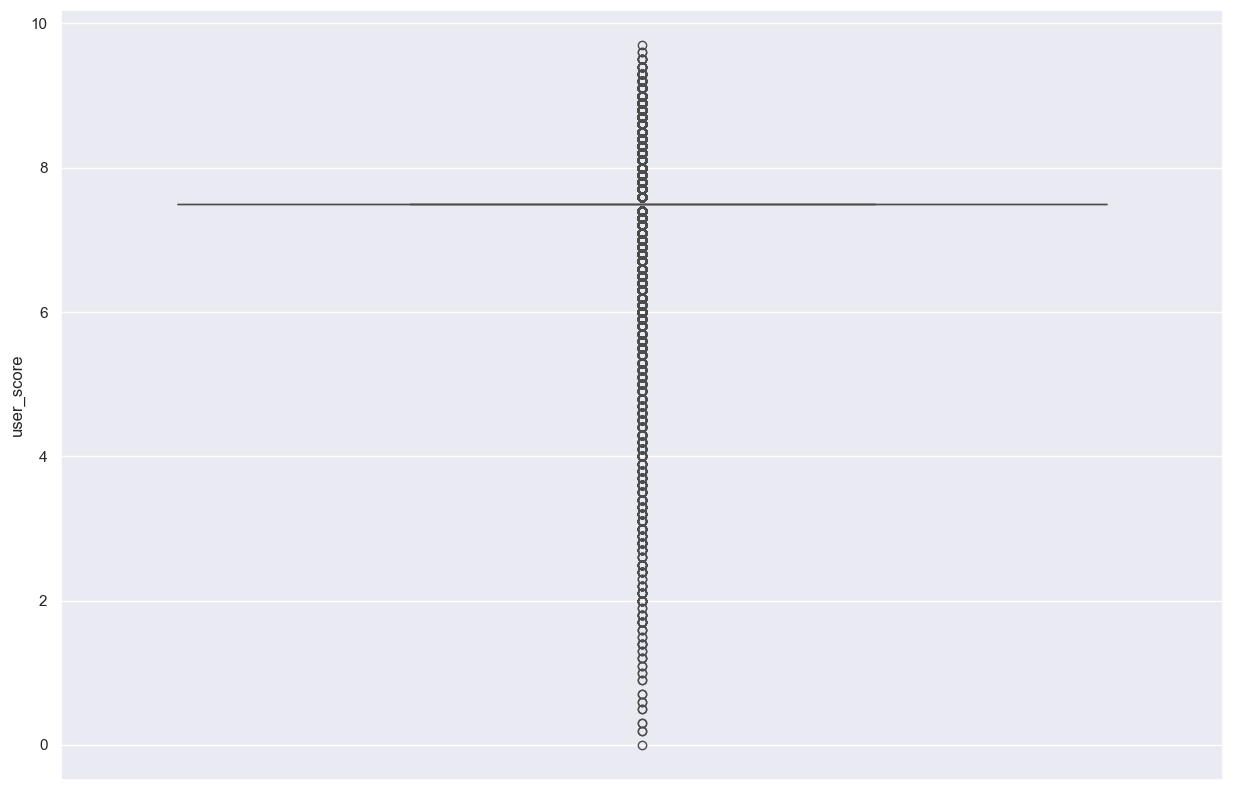

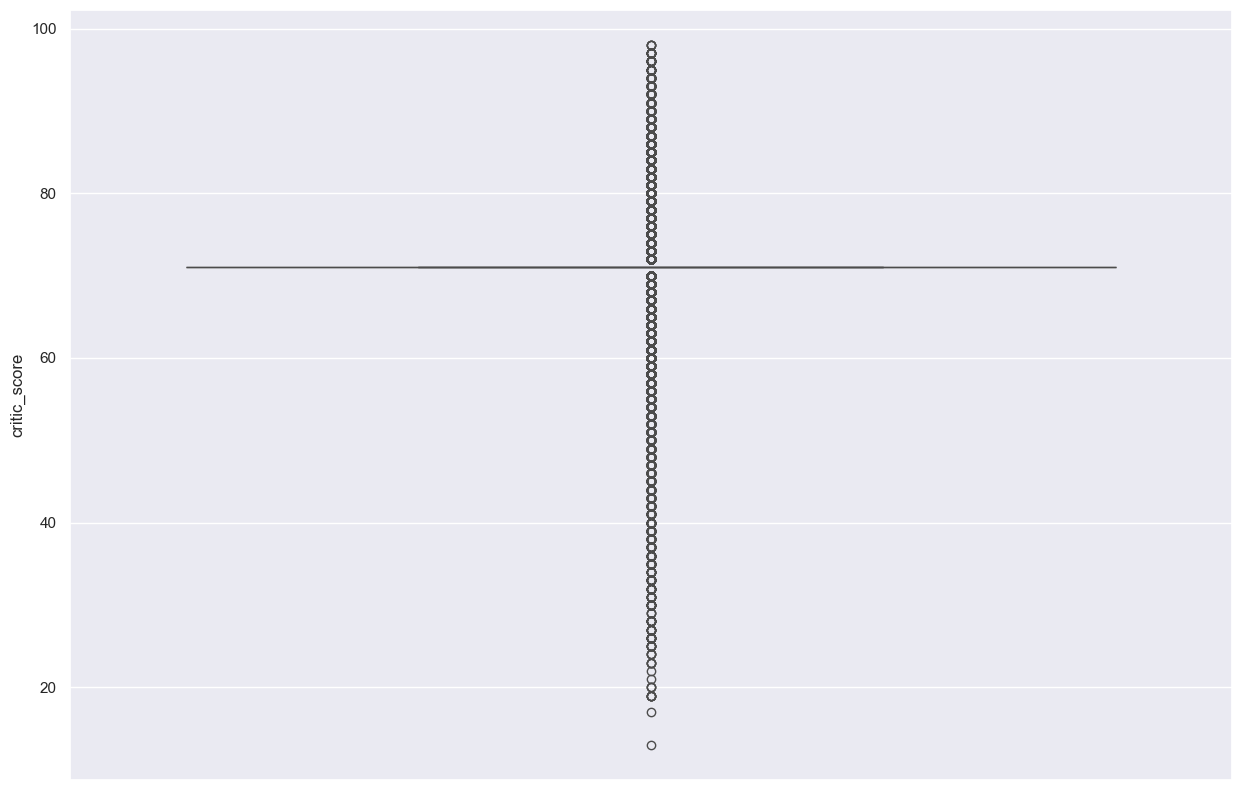

In [1729]:
sns.boxplot(juegos['user_score'])
plt.show()
sns.boxplot(juegos['critic_score'])
plt.show()

In [1730]:
juegos.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,Des
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,Des


En este paso se llenaron los valores ausentes con respeto a todas y cada una de las variables, tambien se cambiaron los nombres de las variables en minusculas. En nombre, genero y rating los reeplace con 'Desconocido', ya que en el caso de genero y nombre se pueden reemplazar facilmente con Desconococido ya que no sabemos su nombre. Y en el caso de rating, lo cual viene la clasificación de cada juego tambien lo podemos clasificar como desconocido ya que aun no se define la clasificación de cada juego. 

En el caso de critic score y user score, se realizo el llenado tomando la mediana de referencia. Y a pesar que de el porcentaje de datos con valores ausentes es más de la mitad. No podemos dehacernos de tantos datos si no la base de datos no serviría. 

Por ultimo en el año de lanzamiento, lo llene con ceros y cambie el tipo de datos a entero. 

In [1732]:
juegos['ventas_totales']= juegos[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [1733]:
juegos

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,Des,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,Des,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,Des,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,Des,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,Des,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,Des,0.01


Ahora de esta manera sume todas las ventas de cada juego y cree una variable para almacenar las ventas totales. 

Paso 3. Analiza los datos

In [1736]:
juegos_lanz = juegos.groupby('year_of_release').count()['name'].reset_index()
juegos_lanz = juegos_lanz.query('year_of_release != 0')
juegos_lanz.columns = ['year_of_release', 'total_games']

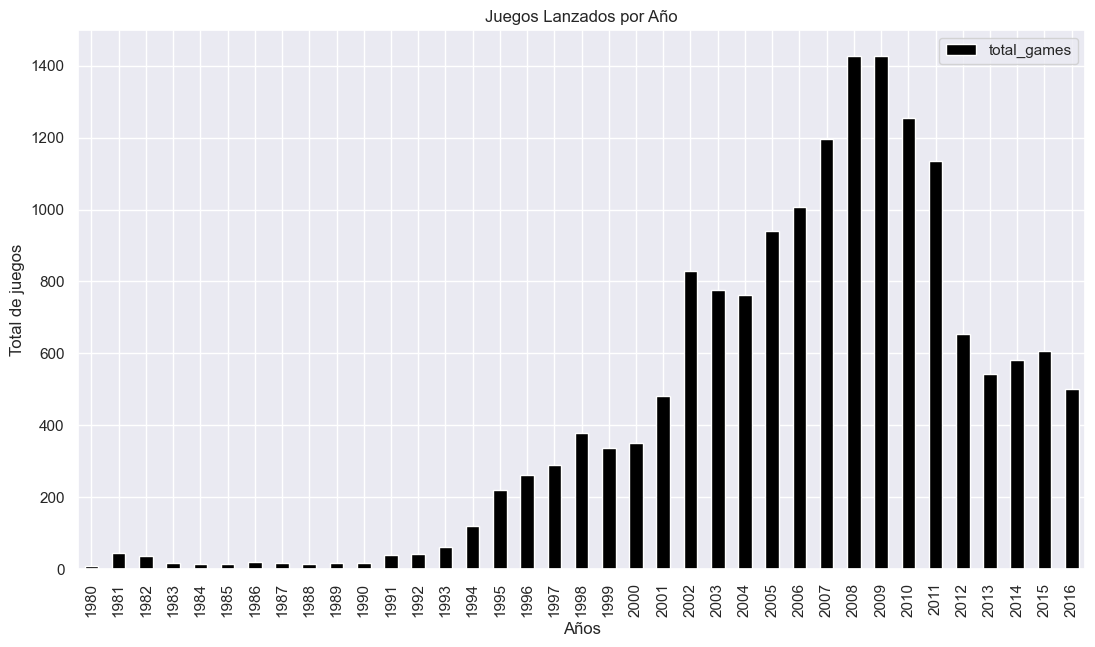

In [1737]:
juegos_lanz.plot(kind='bar', x = 'year_of_release', y= 'total_games',
                 xlabel= 'Años', ylabel= 'Total de juegos', title= 'Juegos Lanzados por Año', 
                 figsize = (13,7), color='black')
plt.show()

Podemos observar que a partir del 2000 hay un incremento significativo en las ventas de los juegos hasta 2012 el cual bajaron y de han mantenido de la misma manera.

In [1739]:
plata_sales = juegos.groupby('platform')['ventas_totales'].sum()
plata_sales = plata_sales.sort_values(ascending=False).reset_index()

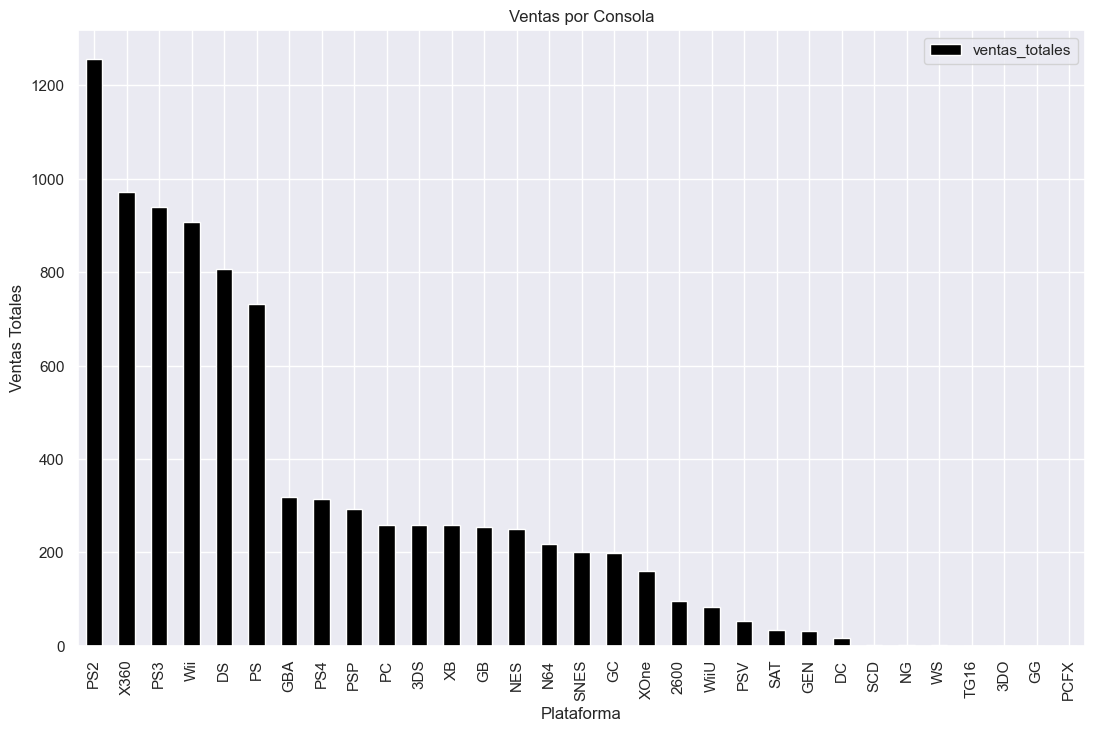

In [1740]:
plata_sales.plot(kind='bar', x='platform', y='ventas_totales', title='Ventas por Consola',  xlabel='Plataforma', ylabel='Ventas Totales', figsize= (13,8), color= 'black')
plt.show()

Podemos observar que a lo largo del tiempo la plataforma con más ventas en la tienda fue PS2, el cual revolucionó el mercado de los videojuegos tal como lo conocemos con los juegos en linea. 

In [1742]:
juegos_tiem_vida = juegos.pivot_table(index = 'year_of_release', columns = 'platform', values = 'ventas_totales', aggfunc = 'sum').fillna(0)

In [1743]:
juegos_tiem_vida = juegos_tiem_vida.iloc[1: :]

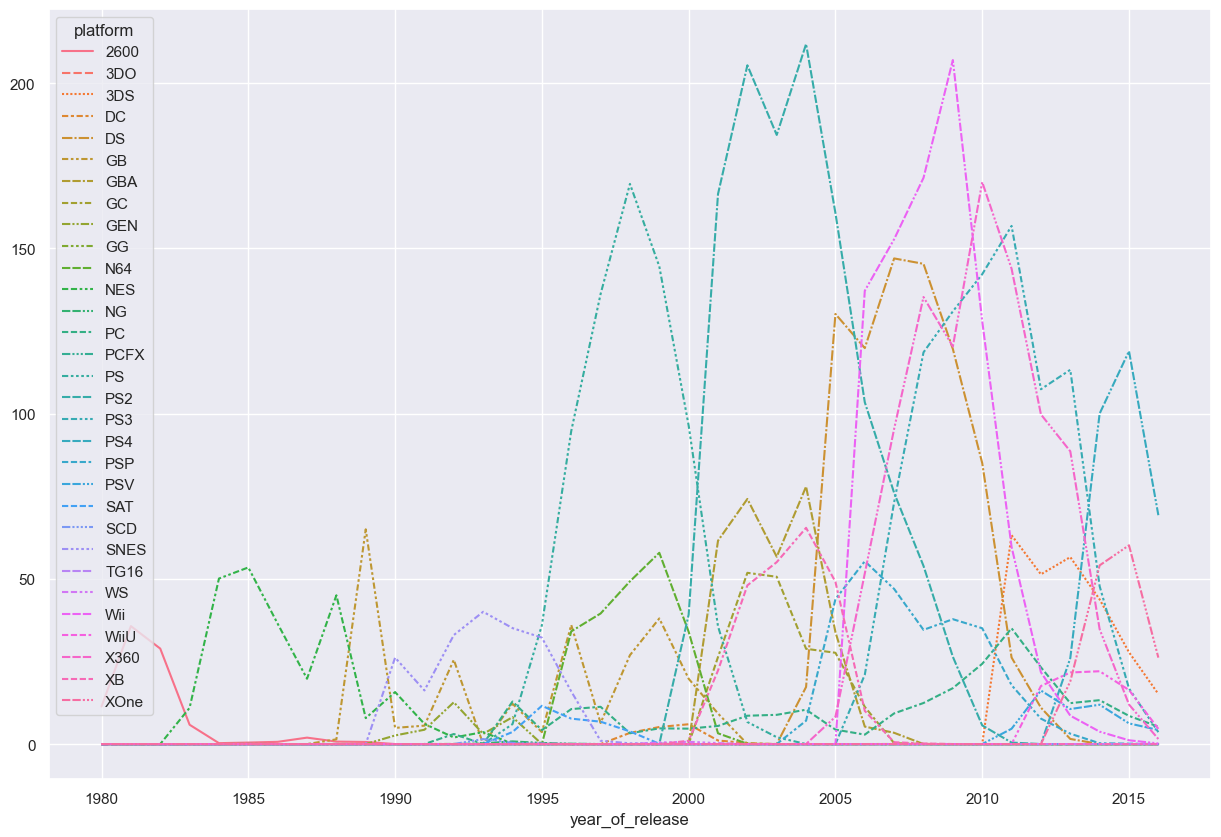

In [1744]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data = juegos_tiem_vida)
plt.show()

En este grafico se puede observar que las plataformas o consolas populares duran aproximadamente 10 años en auge y van disminuyendo. Se podria decir que el tiempo de vida es de 10 años. 

In [1746]:
tiempo_efectivo = juegos[juegos.year_of_release >= 2000]

In [1747]:
data_clean = tiempo_efectivo.pivot_table(index = 'year_of_release', columns = 'platform', values = 'ventas_totales', aggfunc = 'sum').fillna(0)

In [1748]:
data_clean = data_clean.iloc[1: , :]

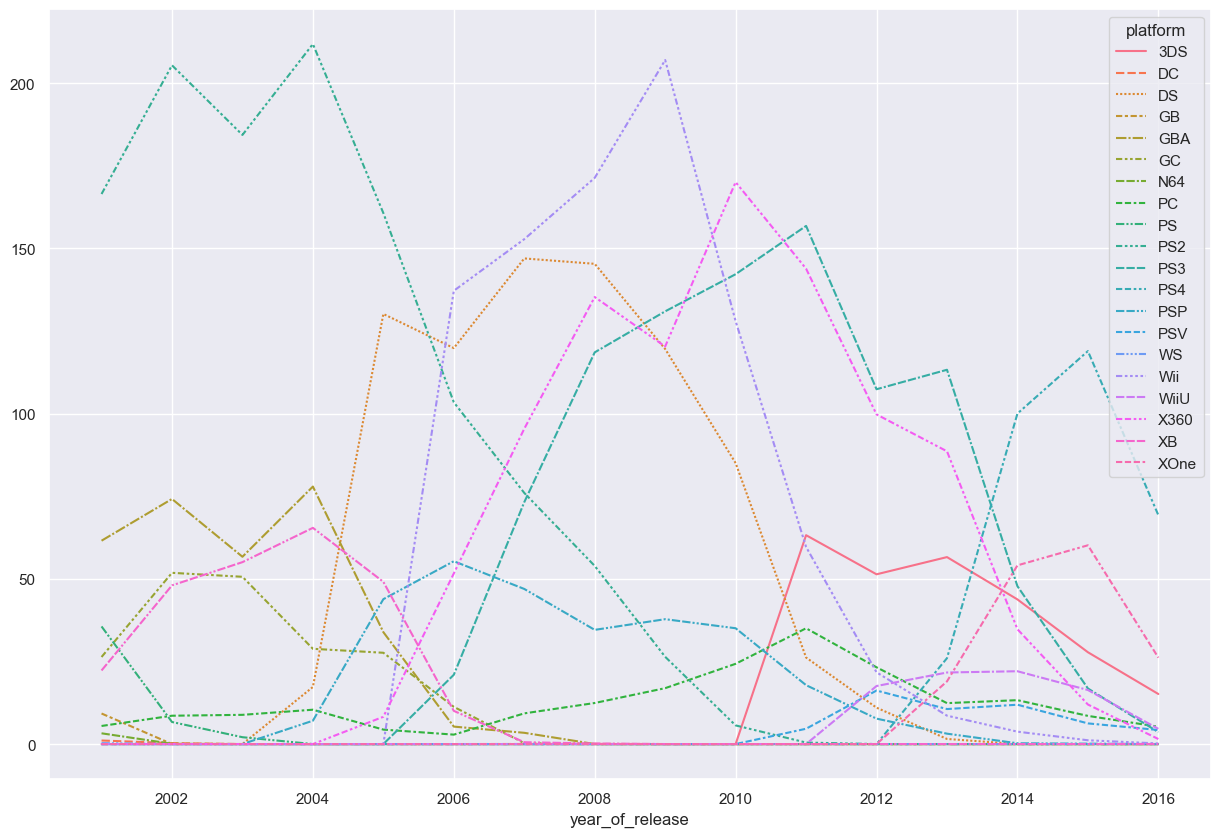

In [1749]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data = data_clean)
plt.show()

Tomamos los datos a partir del año 2000 dado que es interesante el auge de algunas plataformas en este periodo. Podemos observar que las plataformas con mayor nivel de ventas son el Wii, X360, PS3, DS y el PS2 el cual fue desapareciendo poco despues del 2010 pero fue la plataforma con mayor nivel de ventas. De  igual manera el DS tiene un comportamiento a la baja despues del 2010 ya que en la linea del tiempo lo fueron reemplazando otras plataformas. 

Otras de las plataformas que van desapareciendo al paso del tiempo son el PSV, PSP, PC y el WiiU. 

Y las plataformas más rentables fueron PS2, Wii, X360, PS3 y DS

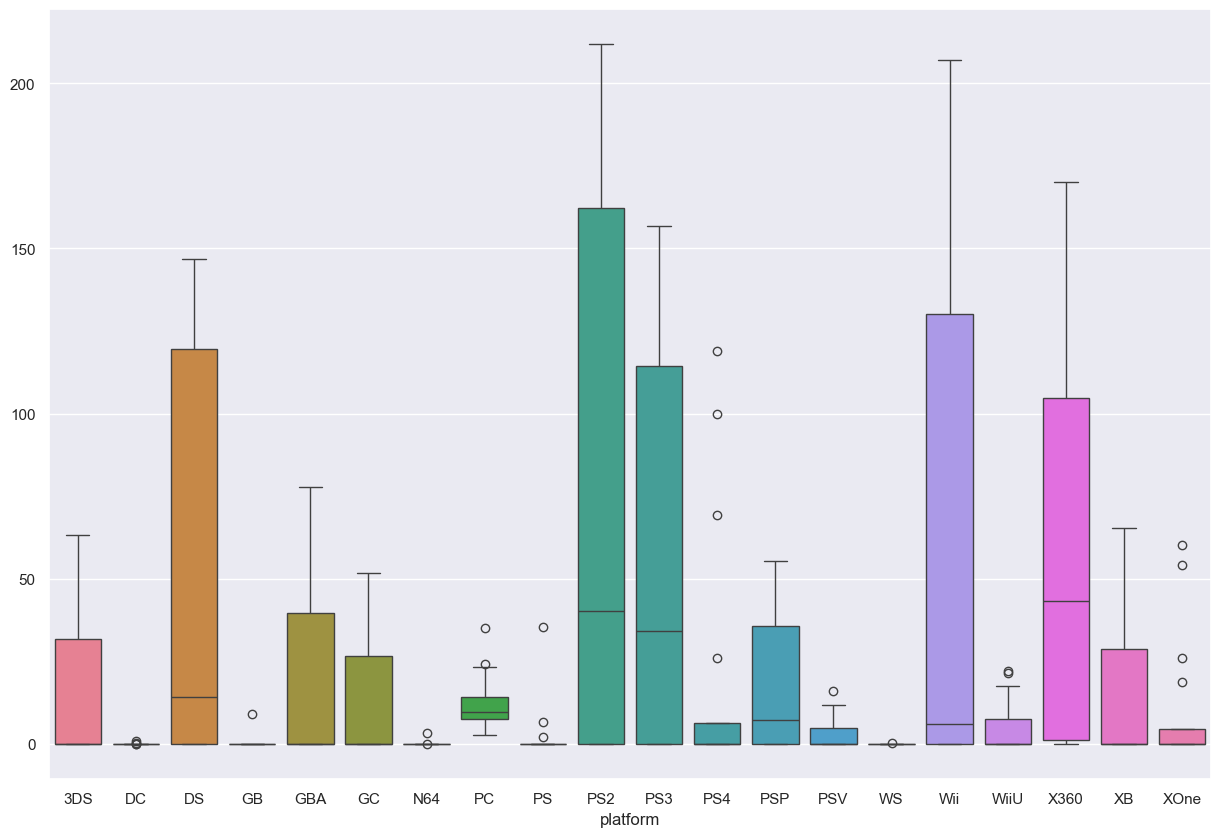

In [1751]:
sns.boxplot(data_clean)
plt.show()

Podemos observar en el diagrama de caja que la dedía de casi todas las plataformas estan muy por debajo de los 50 millones y algunos tienen valores más altos que rebasan significativamente la media como el PS4 Y PS. Podemos observar que casi en algún año parten muy cercano al 0 

Con respecto al DS, PS2, PS3, Wii y X360, son las plataformas que tienen una media más alta y se encuentran valores interciuartilicos con más frecuencia. 

In [1753]:
critic_sales = juegos.pivot_table(index = 'critic_score', columns = ['platform'], values = 'ventas_totales', aggfunc = 'sum').fillna(0)

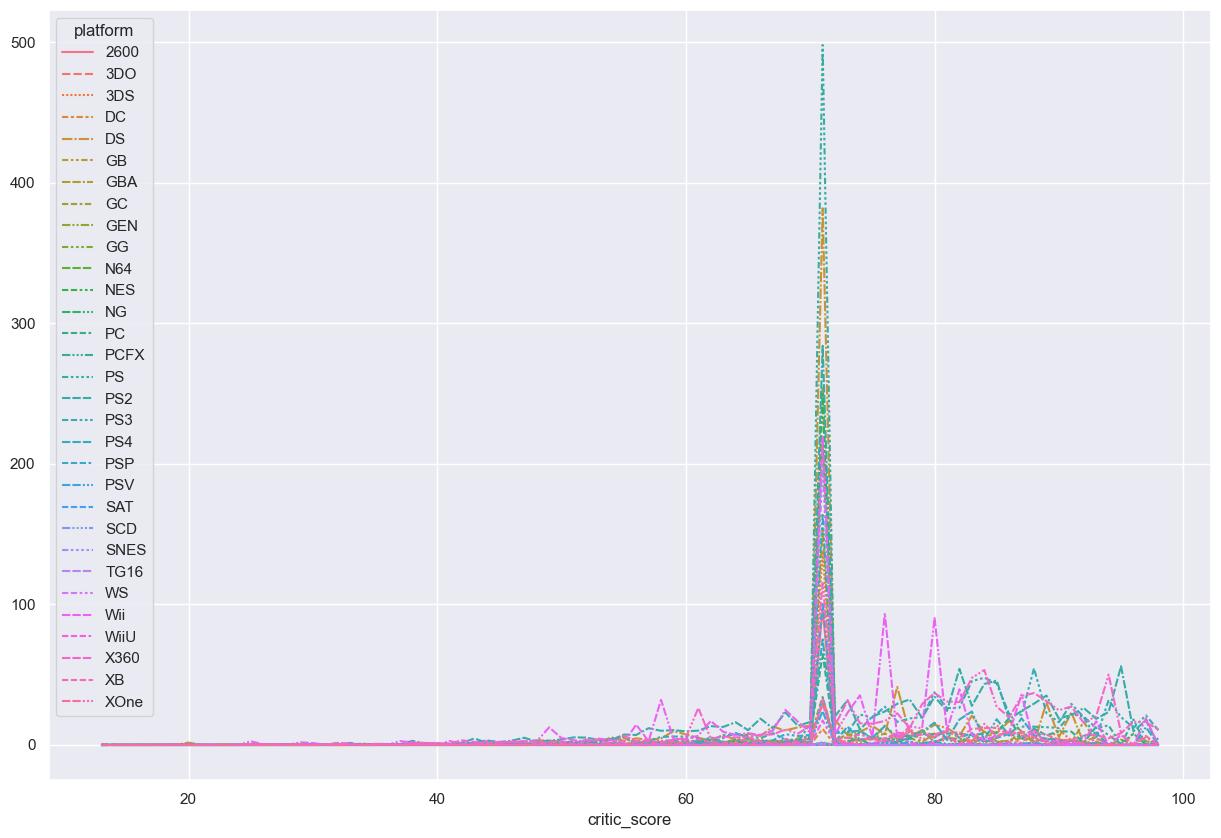

In [1754]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data = critic_sales)
plt.show()

In [1755]:
ps2_sales = juegos[juegos.platform == 'PS2']

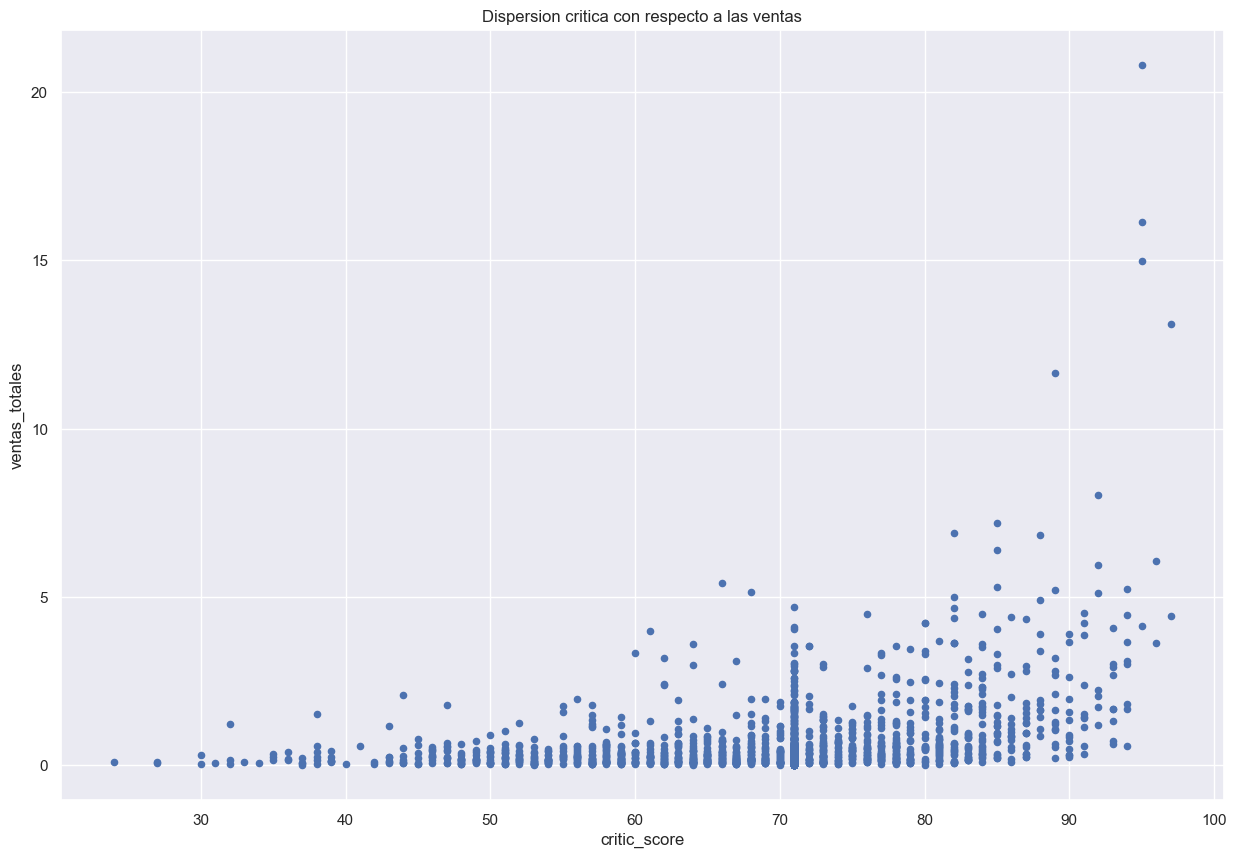

In [1756]:
ps2_sales.plot(kind ='scatter', x= 'critic_score', 
               y= 'ventas_totales', title = 'Dispersion critica con respecto a las ventas')
plt.show()

Podemos observar en el primer grafico que la calificación de los criticos tiene una media que osila entre los 70 los cuales son los que más se venden. 

En el grafico de la plataforma PS2, podemos observar como a partir de la calificación 60, los juegos tienen mayor promedio de ventas. Entonces se puede decir que la calificación y el las ventas de los juegos tienen relación positiva, entre más aumenta la calificación aumentan las ventas.

In [1758]:
genre_sales = juegos.pivot_table(index = 'platform', columns = 'genre', values = 'ventas_totales', aggfunc = 'sum').fillna(0)

In [1759]:
genre_sales

genre,Action,Adventure,Desconocido,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
platform,,,,,,,,,,,,,
2600,29.25,1.70,0.00,1.24,3.57,13.26,14.69,2.91,0.00,26.47,0.44,3.45,0.00
3DO,0.00,0.06,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.00
3DS,58.24,4.92,0.00,10.56,10.99,32.53,5.57,14.96,84.23,1.29,27.45,6.17,2.09
DC,1.26,2.50,0.00,1.83,0.00,2.53,0.00,2.65,0.68,0.33,0.52,3.65,0.00
DS,112.58,45.97,0.00,7.08,135.64,75.83,82.48,38.00,124.45,7.86,129.98,31.38,14.87
GB,7.93,17.15,0.00,0.00,13.35,54.91,47.47,4.55,88.24,1.19,3.55,9.06,8.06
GBA,55.66,14.63,0.00,4.16,36.09,78.21,12.81,18.81,64.20,3.56,5.94,16.32,7.46
GC,37.70,5.93,0.00,18.43,16.72,28.59,4.69,21.87,13.16,13.61,8.61,25.34,4.28
GEN,2.74,0.19,2.42,5.89,0.03,15.44,0.00,0.26,0.27,0.13,0.00,3.21,0.19


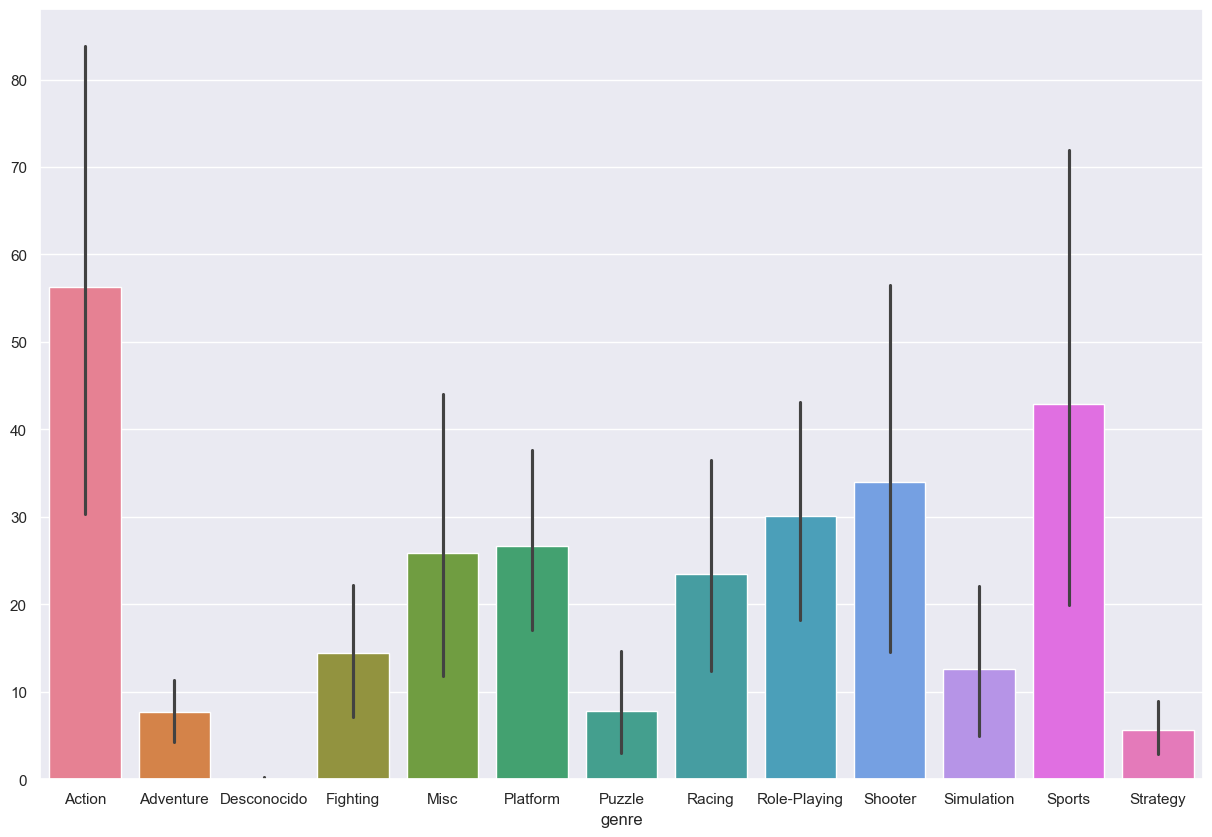

In [1760]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(data = genre_sales)
plt.show()

Podemos observar que el genero de Acción es el unico que rebasa los 50 millones, los demas generos oscilan entre los 30 mill a ecepción de Sports el cual tambien rebasa los 40 millones. Podriamos decir que los juegos de deportes y acción son los juegos más rentables en la industria de los videojuagos. 

Paso 4. Crea un perfil de usuario para cada región

In [1905]:
nac_ventas= juegos.groupby('platform')[['eu_sales','na_sales','jp_sales']].sum().reset_index()

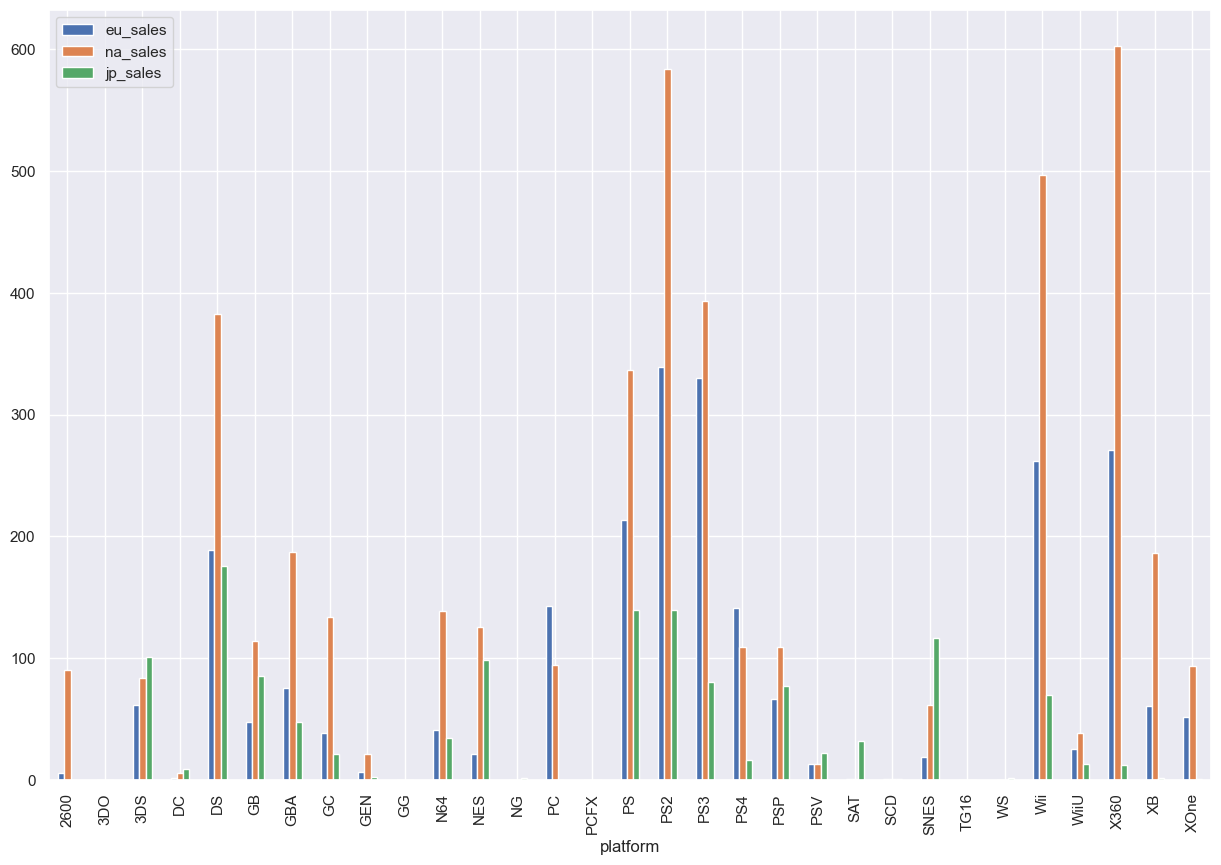

In [1907]:
nac_ventas.plot(kind='bar', x='platform', y=['eu_sales','na_sales','jp_sales'])
plt.show()

Como podemos observar en la grafica, las plataformas que más se vendieron en Norteamerica son X360, PS2, Wii, PS3, DS. 

En el caso de Europa las plataformas que más se venden como podemos observar son PS2, PS3, X360, Wii, PS, como vemos en Europa hay tendencia al consumo de las plataformas Playstation a diferencia de Norteamerica. 

En el caso de Japon hay mucha diferencia, ya que los más vendidos son DS, PS, PS2, SNES, NES, lo cual podemos ver que hay una tendecia al consumo de las plataformas de Nintendo y de Playstation. 

In [1917]:
gen_nac = juegos.groupby('genre')[['eu_sales','na_sales','jp_sales']].sum().reset_index()

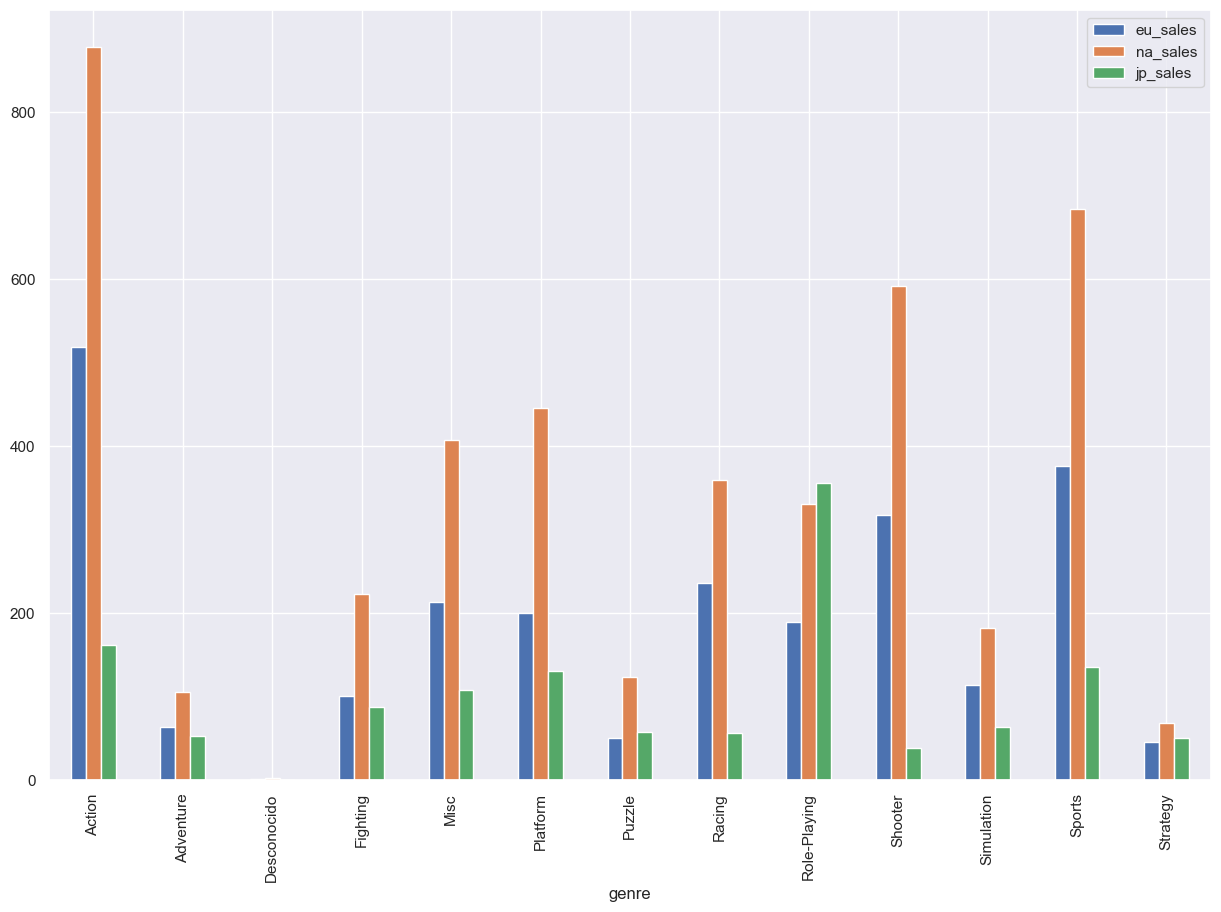

In [1915]:
gen_nac.plot(kind='bar', x='genre', y=['eu_sales','na_sales','jp_sales'])
plt.show()

Como podemos observar en el grafico, los principales generos que se consumen en Norteamerica son Accion, Deportes, Disparos, Misc y Carreras. Lo cual tiene mucho sentido por la tendencia de videojuagos actual. 

En el caso de Europa, los principales generos son Acción, Deportes, Disparos, Carreras y Misc. Como lo mencione anteriormente se mantiene la tendencia de los mismos generos en Eu.

Y por ultimo en el caso de Japon, hay una diferencia ya que el mayor genero es Role-Playing, Acción, Deportes, Misc y Peleas. Por lo que encontramos una diferencia en la tendencia de consumo en el pais Asiatico. 

In [1919]:
rat_sales = juegos.groupby('rating')[['eu_sales','na_sales','jp_sales']].sum().reset_index()
rat_sales

,rating,eu_sales,na_sales,jp_sales
0,AO,0.61,1.26,0.00
1,Des,613.83,1242.46,841.96
2,E,710.25,1292.99,198.11
3,E10+,188.52,353.32,40.20
4,EC,0.11,1.53,0.00
5,K-A,0.27,2.56,1.46
6,M,483.97,748.48,64.24
7,RP,0.08,0.00,0.00
8,T,427.03,759.75,151.40


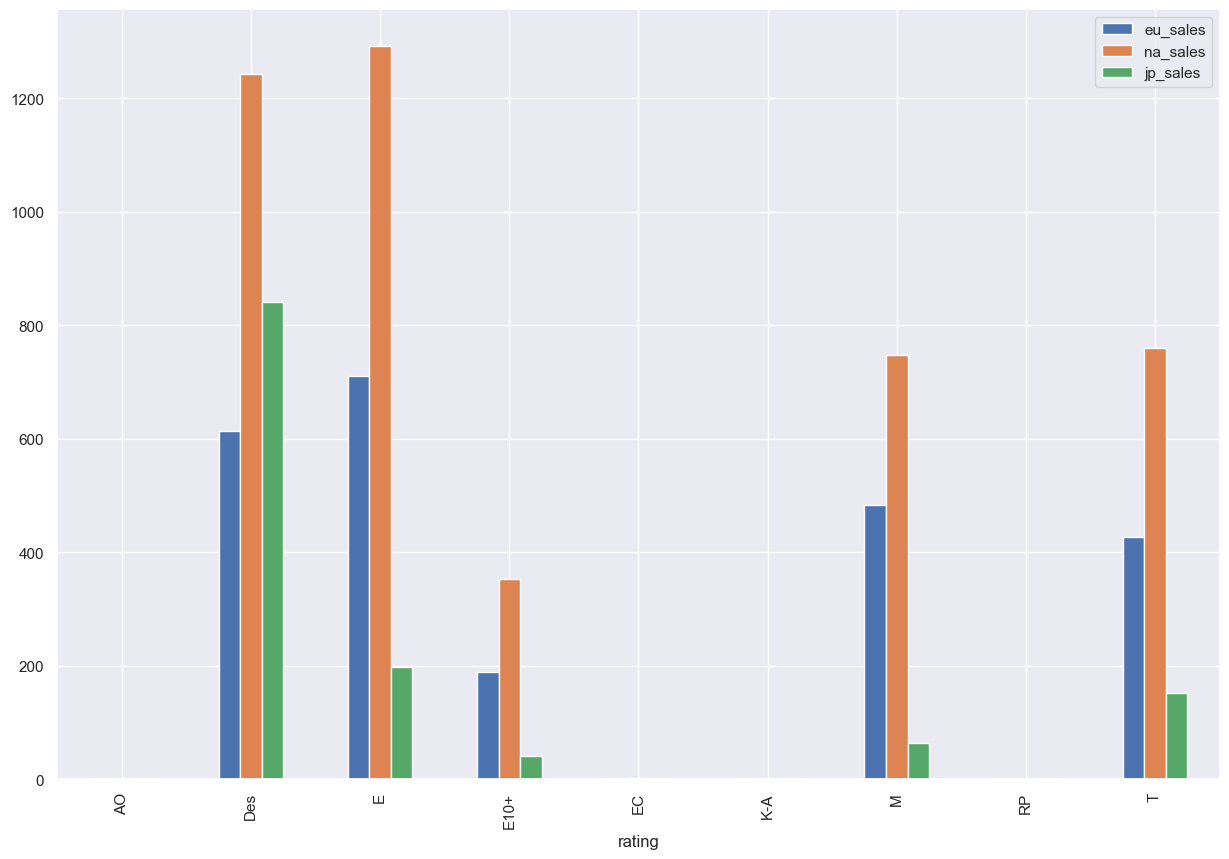

In [1921]:
rat_sales.plot(kind='bar', x='rating', y=['eu_sales','na_sales','jp_sales'])
plt.show()

En este caso podemos obsevar que las ventas en las diferentes naciones tienen una tendencia más lata para los juegos que todos pueden jugar como en el caso de 'E', ya que esa clasificación esta permitida para todas las edades. Y posteriormente hay una tendencia a los juegos para los adolecentes y posterior para los que son menores de 17 años. 

Paso 5. Prueba las siguientes hipótesis

Hipotesis 1: El promedio de de las calificaciónes de las plataformas X360 y PC son iguales.

H0: La calificación promedio de X360 es = al de PC 

H1: La calificaicón promedio de X360 es != al de PC

In [1938]:
hyp_data = juegos.query('user_score > 0 & (platform == "X360" or platform == "PC")')

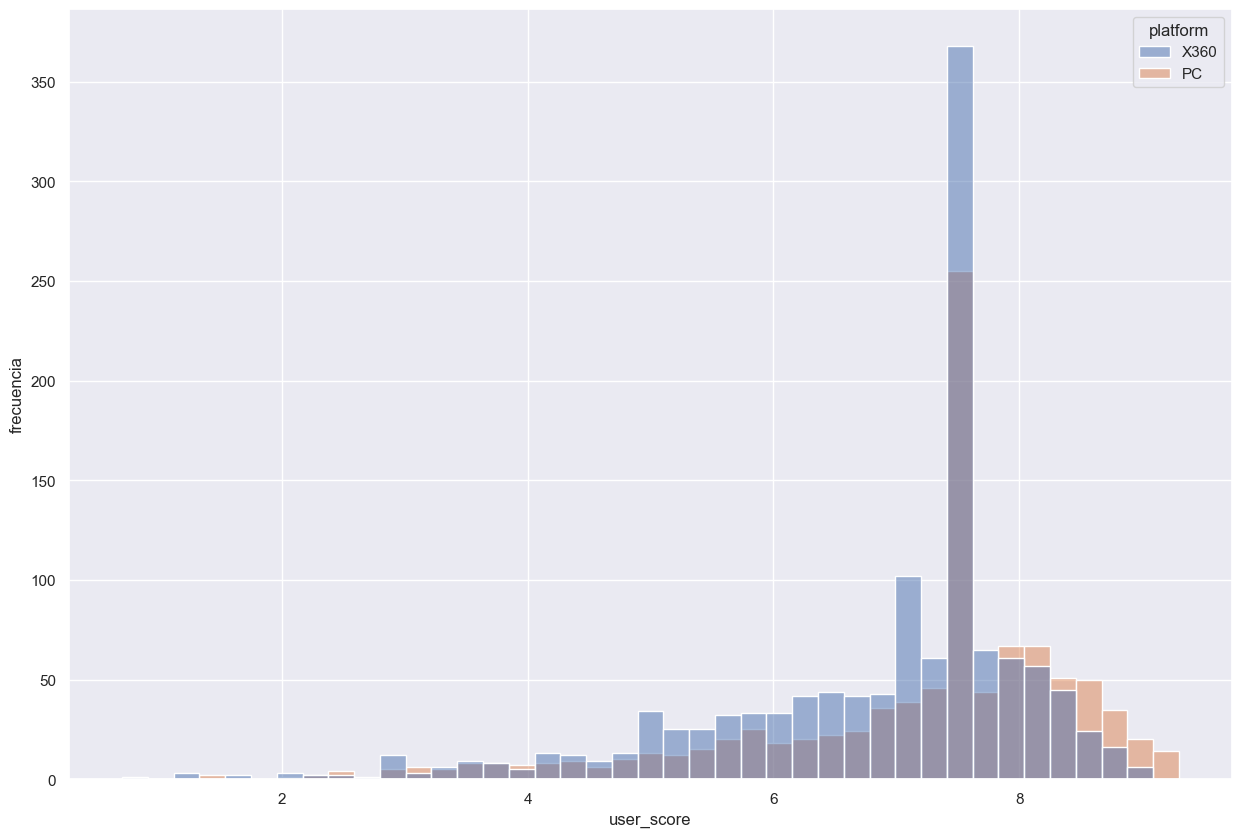

In [1943]:
sns.histplot(hyp_data, x='user_score', hue='platform')
plt.ylabel('frecuencia')
plt.xlabel('user_score')
plt.show()

In [1945]:
hyp_data.groupby('platform')['user_score'].mean()

platform
PC      7.154107
X360    6.875040
Name: user_score, dtype: float64

In [1947]:
x360 = hyp_data.query('platform == "X360"')
pc = hyp_data.query('platform == "PC"')

In [1951]:
alpha = 0.05

H0:La varianza de X360 es diferente ala varianza de PC 

H1:La varianza de X360 es igual a la varianza de PC

In [1962]:
p_value_levane = st.levene(x360['user_score'],pc['user_score']).pvalue

if p_value_levane < alpha:
    print('se rechaza H0: la varianza de X360 no es igual que la varianza de PC')
else:
    print('no se puede rechazar H0: la varianza de X360 y PC no son iguales')

no se puede rechazar H0: la varianza de X360 y PC no son iguales


H0: La calificación promedio de X360 es = al de PC

H1: La calificaicón promedio de X360 es != al de PC

In [1969]:
hipotesis = st.ttest_ind(x360['user_score'] ,pc['user_score'] , equal_var =False)

In [2000]:
if hipotesis.pvalue < 0.05:
    print('Rechazmos la HO: la calificación promedio son diferentes entre ambas plataformas')
else:
    print('Aceptamos H0: la calificació promedio es igual para ambas plataformas')

Rechazmos la HO: la calificación promedio son diferentes entre ambas plataformas


Hipotesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [1978]:
hyp_data_gen = hyp_data = juegos.query('user_score > 0 & (genre == "Action" or genre == "Sports")')

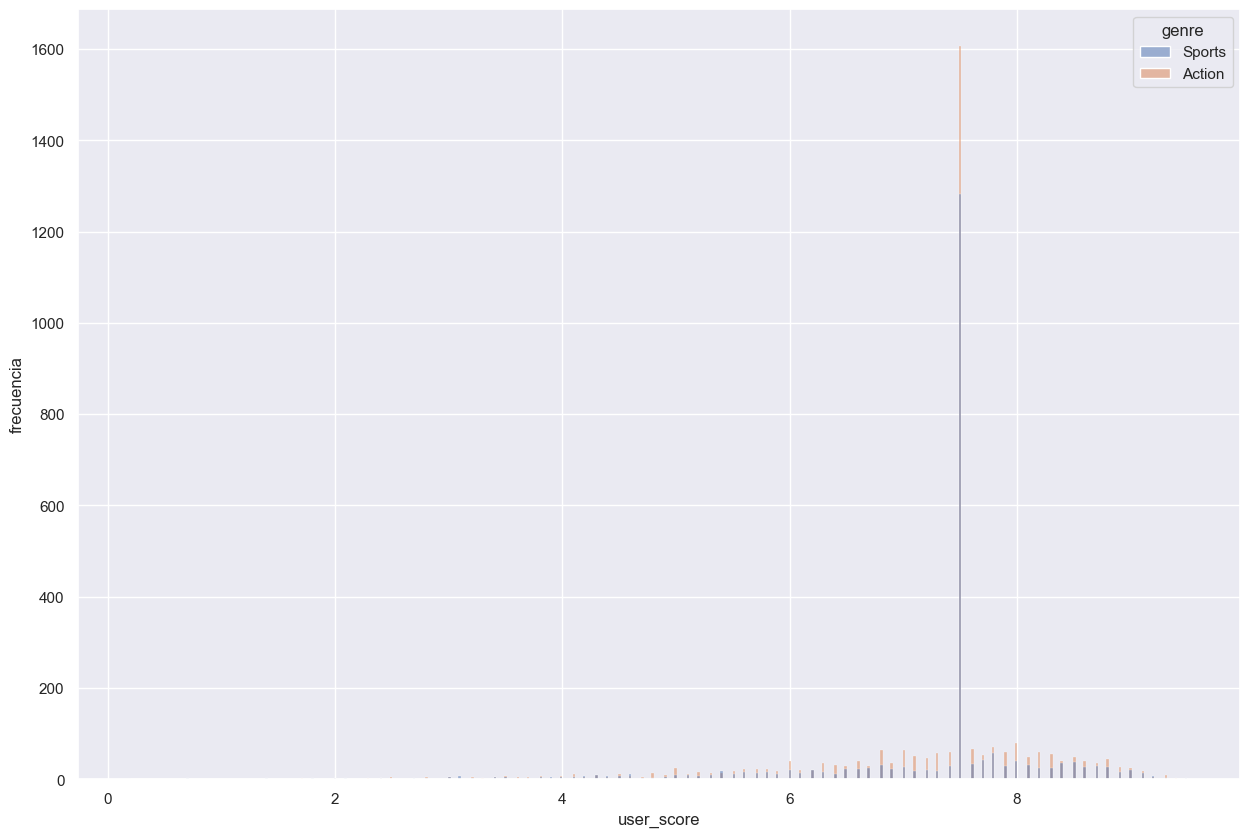

In [1980]:
sns.histplot(hyp_data, x='user_score', hue='genre')
plt.ylabel('frecuencia')
plt.xlabel('user_score')
plt.show()

In [1984]:
hyp_data_gen.groupby('genre')['user_score'].mean()

genre
Action    7.257762
Sports    7.246891
Name: user_score, dtype: float64

In [1986]:
accion = hyp_data.query('genre == "Action"')
sports = hyp_data.query('genre == "Sports"')

H0: La calificación promedio de Accion es = al de Deportes

H1: La calificaicón promedio de Acción es != al de Deportes

In [2019]:
p_value_levane2 = st.levene(accion['user_score'],sports['user_score']).pvalue

if p_value_levane2 < alpha:
    print('se rechaza H0: la varianza de Acción es igual que la varianza de Deportes')
else:
    print('no se puede rechazar H0: la varianza de Acción y Deportes no son iguales')

no se puede rechazar H0: la varianza de Acción y Deportes no son iguales


H0: La calificación promedio de Acción es = al de Deportes

H1: La calificaicón promedio de Acción es != al de Deportes

In [2022]:
hipotesis2 = st.ttest_ind(accion['user_score'] ,sports['user_score'] , equal_var =False)

In [2024]:
if hipotesis2.pvalue < 0.05:
    print('Rechazmos la H0: la calificación promedio es diferente entre ambos generos')
else:
    print('Aceptamos H0: la calificació promedio es igual para ambos generos')

Aceptamos H0: la calificació promedio es igual para ambos generos


Por ultimo realizamos la pruebas de hipotesis, primero realizamos la prueba de levene la cua nos confirma en las dos hipotesis que la varianza de ambas series no son iguales. Por lo que procedimos a comprobar si la media de la calificiación de la plataforma X360 y PC son iguales, lo cual nos dio como resultado que 'NO' la media de la calificiación de ambas plataformas no son iguales. 

En la segunda hipotesis declaramos que la media de la calificación de los generos de acción y deportes son iguales entre si, lo cual nos arrojo que en efecto, la media de ambos generos son iguales entre si.

Conclución del Proyecto:

En conclución del analisis, podemos darnos cuenta la tendencia de consumo entre los diferentes paises y la tendencia en general del comportamiento de las ventas y lanzamientos de los videojuegos. 

Con respecto a a los lanzamientos, podemos observar que hay una tendencia alsista apartir del 2002 hasta 2012. la cual duró 10 años, lo mismo que se mantienen en el mercado las distintas plataformas antes de que se actualicen o se eliminen. 

Tambien nos pudimos dar cuenta que la plataforma que más se vendío a travez de los años es la PS2, la cual revolucionó el mercado de los videojugos a partir de los años 2000 y en general las plataformas más importantes y con más ingresos son: PS2, Wii, X360, PS3 y DS. 

Al analizar la calificiacón de los profecionales en el PS2 podemos observar que hay una tendencia positica con respecto a las ventas, ya que entre mejor la calificación, mayor numero de ingreso se obtubo.Al analizar los generos de todas las plataformas, podemos ver que hay una tendencia muy marcada en el genero de Acción y Deportes. Los cuales son los más importates a nivel mundial, seguido muy de serca el genero de Disparos. 

Al analizar las ventas por region, pudimos darnos cuenta que cada region tiene como favoritos diferentes plataformas, en estados unidos se ve muy variado con respecto a las plataformas de Nintendo, Xbox y Playstation. Pero en japon y Europa cambian los gustos, ya que en Europa hay una preferencia a Playstation y en Japon al Nintendo. Lo que corresponde al genero en Estados unidos y Europa la preferencia es muy parecida, sin embargo, no en Japon ya que los gustos cambian un poco a comparación de las otras dos regiones. Y por ultimo al analizar el rating, podemos darnos cuenta que el rating en todas las regiones se tiene una preferencia considerable en los juegos que todo tipo de persona pude juagar osea de clasificación 'E'. 

Por ultimo creamos las hipotesis para demostrar si a calificiación promedio de X360 y PC son iguales. Lo cual a relaizar las pruebas pertinentes nos dimos cuenta de que no, son diferentes entre si. Y en el caso de la ultima hipotesis, pudimos demostrar que la media de la calificación los generos de Acción y Deportes son iguales. Lo cual podemos decir que los dos son los generos mejores calificados. 

